In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
import Thermobar as pt
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [3]:
Wieser_sigma=pt.import_excel('Wieser_Probe_Errors.xlsx',
                              sheet_name='Sheet1')
Wieser_sigma_in=Wieser_sigma['my_input']
Wieser_sigma_Cpx=Wieser_sigma['Cpxs']


Wieser_conv=pt.convert_oxide_percent_to_element_weight_percent(df=Wieser_sigma_Cpx, suffix='_Cpx', without_oxygen=True)

Pec_Err_Na=100*Wieser_sigma_in['Na']/Wieser_conv['Na_wt_noO2']
Pec_Err_Al=100*Wieser_sigma_in['Al']/Wieser_conv['Al_wt_noO2']
Pec_Err_Ti=100*Wieser_sigma_in['Ti']/Wieser_conv['Ti_wt_noO2']
Pec_Err_Ca=100*Wieser_sigma_in['Ca']/Wieser_conv['Ca_wt_noO2']
Pec_Err_Fe=100*Wieser_sigma_in['Fe']/Wieser_conv['Fe_wt_noO2']
Pec_Err_Mg=100*Wieser_sigma_in['Mg']/Wieser_conv['Mg_wt_noO2']
Pec_Err_Mn=100*Wieser_sigma_in['Mn']/Wieser_conv['Mn_wt_noO2']
Pec_Err_Si=100*Wieser_sigma_in['Si']/Wieser_conv['Si_wt_noO2']
Pec_Err_Cr=100*Wieser_sigma_in['Cr']/Wieser_conv['Cr_wt_noO2']


Wieser_Cpx_Err=pd.DataFrame(data={'SiO2_Cpx_Err': np.nanmean(Pec_Err_Si),
                            'TiO2_Cpx_Err':np.nanmean(Pec_Err_Ti),
                             'Al2O3_Cpx_Err':np.nanmean(Pec_Err_Al),
                             'FeOt_Cpx_Err':np.nanmean(Pec_Err_Fe),
                            'MnO_Cpx_Err':np.nanmean(Pec_Err_Mn),
                            'MgO_Cpx_Err':np.nanmean(Pec_Err_Mg),
                            'CaO_Cpx_Err':np.nanmean(Pec_Err_Ca),
                            'Na2O_Cpx_Err':np.nanmean(Pec_Err_Na),
                            'Cr2O3_Cpx_Err':np.nanmean(Pec_Err_Cr),
                               'K2O_Cpx_Err': 0}, index=[0])



In [4]:
Wieser_Liq_Err=Wieser_Cpx_Err.copy()
Wieser_Liq_Err.columns = Wieser_Liq_Err.columns.str.replace('_Cpx', '_Liq')
Wieser_Liq_Err=Wieser_Liq_Err*0
Wieser_Liq_Err['NiO_Liq_Err']=0
Wieser_Liq_Err['P2O5_Liq_Err']=1
Wieser_Liq_Err['H2O_Liq_Err']=0
Wieser_Liq_Err['CO2_Liq_Err']=0
Wieser_Liq_Err.head()


,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,Cr2O3_Liq_Err,K2O_Liq_Err,NiO_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,CO2_Liq_Err
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0


In [19]:
out_Cpx_B1038=pt.import_excel('Hawaii_Data.xlsx',
                              sheet_name='Sheet1')
Cpx_B1038_all=out_Cpx_B1038['Cpxs']
Liq_B1038_all=out_Cpx_B1038['Liqs']
Cpx_B1038_input_all=out_Cpx_B1038['my_input']


In [21]:
Cpx_B1038_all.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.9571,0.9522,2.67160,8.24280,0.22070,17.29490,17.3036,0.2948,0,0.34100,0
1,51.9571,0.9522,2.67160,8.24280,0.22070,17.29490,17.3036,0.2948,0,0.34100,1
2,51.3190,0.9928,2.49735,7.56720,0.19330,16.08815,19.3721,0.2647,0,0.24865,2
3,51.7440,1.0428,2.73145,8.01905,0.20755,16.48185,18.5930,0.2657,0,0.31945,3
4,51.5288,1.0530,2.63800,8.20370,0.21470,16.59270,18.2763,0.2477,0,0.26960,4


In [7]:
Liq_B1038_all.columns

Index(['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'Cr2O3_Liq', 'P2O5_Liq', 'H2O_Liq',
       'Fe3Fet_Liq', 'NiO_Liq', 'CoO_Liq', 'CO2_Liq', 'Sample_ID_Liq'],
      dtype='object')

In [8]:
Wieser_Mean_Cpx=Cpx_B1038_all.mean(axis=0).to_frame().T
Wieser_Mean_Liq=Liq_B1038_all.mean(axis=0).to_frame().T
Wieser_noise1=pt.add_noise_sample_1phase(phase_comp=Wieser_Mean_Cpx, 
                                        phase_err=Wieser_Cpx_Err,
                                  phase_err_type="Perc", duplicates=5000, 
                                  err_dist="normal", positive=False)



In [22]:
CpxP=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1038_all)
CpxP.head()

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,P_Put_Teq32d_Peq32a,P_Put_Teq32d_Peq32b,"Jd_from 0=Na, 1=Al",SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,H2O_Liq,T_Put_Teq32d_subsol_Peq32a,T_Put_Teq32d_subsol_Peq32b,P_Put_Teq32d_subsol_Peq32a,P_Put_Teq32d_subsol_Peq32b
0,2.766990,1439.707782,1419.901244,1.601853,1429.201111,1437.481111,1.929567,1468.297310,1456.842047,2.169813,5.440107,4.062478,0,51.9571,0.9522,2.67160,8.24280,0.22070,17.29490,17.3036,0.2948,0,0.34100,0,1.922406,0.953953,0.255053,0.685977,0.116501,0.021148,0.0,0.006917,0.026501,0.009975,0.0,0.077594,0.038906,0.503410,0.134594,0.361997,3.998430,0.361997,0.000000,0.255053,0.000000,0.004987,0.271257,0.789033,0.021148,0.017758,0.029918,0.633314,0.287846,0.633314,0.496867,-0.003140,0.258193,0,1354.373915,1327.195758,3.529350,0.984045
1,2.766990,1439.707782,1419.901244,1.601853,1429.201111,1437.481111,1.929567,1468.297310,1456.842047,2.169813,5.440107,4.062478,0,51.9571,0.9522,2.67160,8.24280,0.22070,17.29490,17.3036,0.2948,0,0.34100,1,1.922406,0.953953,0.255053,0.685977,0.116501,0.021148,0.0,0.006917,0.026501,0.009975,0.0,0.077594,0.038906,0.503410,0.134594,0.361997,3.998430,0.361997,0.000000,0.255053,0.000000,0.004987,0.271257,0.789033,0.021148,0.017758,0.029918,0.633314,0.287846,0.633314,0.496867,-0.003140,0.258193,0,1354.373915,1327.195758,3.529350,0.984045
2,0.727707,1418.935790,1394.145025,0.416087,1361.870000,1416.123333,0.200362,1438.622300,1435.540597,0.652100,2.604786,2.232605,0,51.3190,0.9928,2.49735,7.56720,0.19330,16.08815,19.3721,0.2647,0,0.24865,2,1.920501,0.897534,0.236825,0.776759,0.110147,0.019206,0.0,0.006127,0.027947,0.007357,0.0,0.079499,0.030648,0.469638,0.123920,0.406442,4.002403,0.406442,0.004806,0.232019,0.020295,0.003678,0.190088,0.791220,0.019206,0.011442,0.034028,0.727610,0.203375,0.727610,0.572611,0.004806,0.232019,0,1276.867676,1243.677838,2.275963,-0.988447
3,1.615380,1425.034628,1414.642537,0.674343,1417.030000,1422.518889,0.375316,1451.487280,1442.844119,0.711529,4.024712,2.981661,0,51.7440,1.0428,2.73145,8.01905,0.20755,16.48185,18.5930,0.2657,0,0.31945,3,1.917674,0.910604,0.248539,0.738308,0.119307,0.019092,0.0,0.006515,0.029070,0.009360,0.0,0.082326,0.036981,0.479909,0.130986,0.389105,3.998468,0.389105,0.000000,0.248539,0.000000,0.004680,0.224677,0.785578,0.019092,0.017889,0.032218,0.683521,0.237811,0.683521,0.533962,-0.003063,0.251602,0,1311.985099,1280.442076,2.798432,-0.233524
4,1.346429,1422.453919,1411.707214,0.828980,1415.256667,1426.505556,0.345391,1448.263415,1439.301929,0.666449,3.736885,2.654793,0,51.5288,1.0530,2.63800,8.20370,0.21470,16.59270,18.2763,0.2477,0,0.26960,4,1.917640,0.920540,0.255319,0.728750,0.115704,0.017873,0.0,0.006768,0.029476,0.007932,0.0,0.082360,0.033344,0.483322,0.134053,0.382624,4.000002,0.382624,0.000003,0.255315,0.000014,0.003966,0.235450,0.782860,0.017873,0.015471,0.033444,0.675868,0.249995,0.675868,0.526086,0.000003,0.255315,0,1316.477147,1285.520139,2.551190,-0.408470


Text(0, 0.5, 'Calc P Cpx')

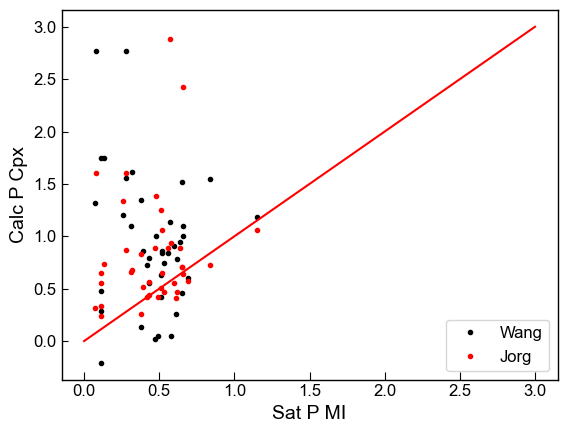

In [26]:
plt.plot(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
         CpxP['P_Wang21_eq1'],  '.k', label='Wang')
plt.plot(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
         CpxP['P_Jorgenson22'],  '.r', label='Jorg')
plt.legend()
plt.plot([0, 3], [0, 3], '-r')
plt.xlabel('Sat P MI')
plt.ylabel('Calc P Cpx')

In [ ]:



Calc29c_sorted=np.sort(Calc29c['P_kbar_calc'])
Calc29b_sorted=np.sort(Calc29b['P_kbar_calc'])
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
CalcWangSorted=np.sort(CpxP['P_Wang21_eq1'])
CalcJSorted=np.sort(CpxP['P_Jorgenson22'])

b=1


ax1.step(np.concatenate([CalcWangSorted, CalcWangSorted[[-1]]]),
         np.arange(CalcWangSorted.size+1)/CalcWangSorted.size, color='red', linewidth=b, label='Wang21')

ax1.step(np.concatenate([CalcJSorted, CalcJSorted[[-1]]]),
         np.arange(CalcJSorted.size+1)/CalcJSorted.size, color='orange', linewidth=b, label='Jorgenson22')
ax1.legend()
ax1.set_xlabel('P (kbar)')
ax1.set_ylabel('Cum frequency')



In [10]:

Wieser_Liq_noise=pt.add_noise_sample_1phase(phase_comp=Wieser_Mean_Liq,
                                        phase_err=Wieser_Liq_Err,
                                  phase_err_type="Abs", duplicates=5000, 
                                  err_dist="normal", positive=False)

In [11]:
eq32a32d=pt.calculate_cpx_only_press_temp(cpx_comps=Wieser_noise1, 
                                       equationP="P_Put2008_eq32a",
                                         equationT="T_Put2008_eq32d")

c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [12]:
NPeq33_real=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1038_all, liq_comps=Liq_B1038_all,
                                       equationP="P_Neave2017", equationT="T_Put2008_eq33")
P30P33_real=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1038_all, liq_comps=Liq_B1038_all,
                                       equationP="P_Put2008_eq30", equationT="T_Put2008_eq33")

P2003_real=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1038_all, liq_comps=Liq_B1038_all,
                                       equationP="P_Put2003", equationT="T_Put2003")
P1996_T2P1=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1038_all, liq_comps=Liq_B1038_all,
                                       equationP="P_Put1996_eqP1", equationT="T_Put1996_eqT2")


P1996_real=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1038_all, liq_comps=Liq_B1038_all,
                                       equationP="P_Put1996_eqP1", equationT="T_Put1996_eqT2")

eq32a32d_real=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_B1038_all, 
                                       equationP="P_Put2008_eq32a",
                                         equationT="T_Put2008_eq32d")

NPeq33_syn=pt.calculate_cpx_liq_press_temp(cpx_comps=Wieser_noise1, liq_comps=Wieser_Liq_noise,
                                       equationP="P_Neave2017", equationT="T_Put2008_eq33")
P30P33_syn=pt.calculate_cpx_liq_press_temp(cpx_comps=Wieser_noise1, liq_comps=Wieser_Liq_noise,
                                       equationP="P_Put2008_eq30", equationT="T_Put2008_eq33")

P1996_syn=pt.calculate_cpx_liq_press_temp(cpx_comps=Wieser_noise1, liq_comps=Wieser_Liq_noise,
                                       equationP="P_Put1996_eqP1", equationT="T_Put1996_eqT2")

eq32a32d_syn=pt.calculate_cpx_only_press_temp(cpx_comps=Wieser_noise1, 
                                       equationP="P_Put2008_eq32a",
                                         equationT="T_Put2008_eq32d")

c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
c:\Users

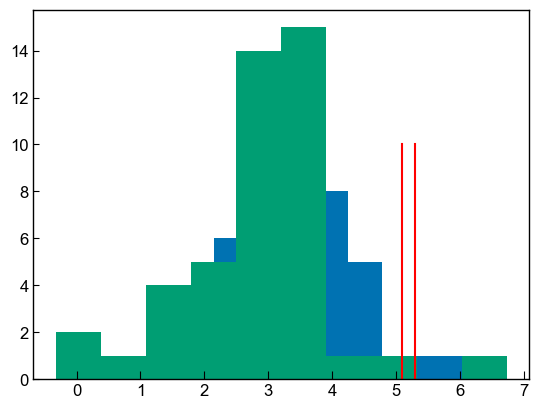

In [13]:
plt.hist(P2003_real['P_kbar_calc'])
plt.plot([5.1, 5.1], [0, 10], '-r')

plt.hist(P1996_T2P1['P_kbar_calc'])
plt.plot([5.3, 5.3], [0, 10], '-r')

## Standard deviation

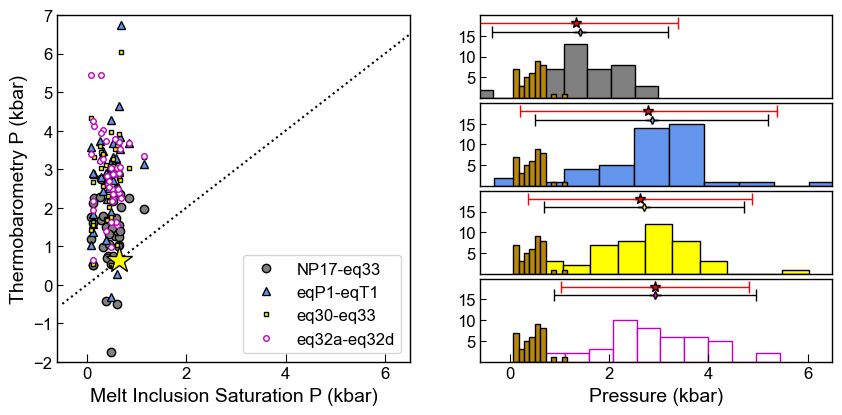

In [14]:
figure_mosaic="""
    AB
    AC
    AD
    AE

    """
fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10, 4.5), sharex=True)
axes['B'].axes.get_xaxis().set_visible(False)
axes['C'].axes.get_xaxis().set_visible(False)
axes['D'].axes.get_xaxis().set_visible(False)

y_co=16
offset=2
elw=1
axes['A'].plot( Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
         NPeq33_real['P_kbar_calc'],'o', mfc='grey', mec='k', label='NP17-eq33')
axes['A'].plot( Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
        P1996_real['P_kbar_calc'],'^', mfc='cornflowerblue', mec='k', alpha=1, label='eqP1-eqT1')

axes['A'].plot( Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
        P30P33_real['P_kbar_calc'],'sk', mfc='yellow', ms=3, label='eq30-eq33')
axes['A'].plot(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000,
        eq32a32d_real['P_kbar_calc'],'om', mfc='white', ms=4, label='eq32a-eq32d')
axes['A'].legend()
    
    


axes['B'].hist(NPeq33_real['P_kbar_calc'], fc='grey', ec='k')
axes['B'].hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')
axes['B'].errorbar(np.nanmean(NPeq33_real['P_kbar_calc']), y_co, 
                   xerr=2*np.nanstd(NPeq33_real['P_kbar_calc']), yerr=0,
             fmt='d', ecolor='k', elinewidth=elw, mfc='grey', ms=4, mec='k', capsize=4)
axes['B'].errorbar(np.nanmean(NPeq33_syn['P_kbar_calc']), y_co+offset, 
                   xerr=2*np.nanstd(NPeq33_syn['P_kbar_calc']), yerr=0,
             fmt='*', ecolor='r',  elinewidth=elw, mfc='red', ms=8, mec='k', capsize=4)


axes['C'].hist(P1996_real['P_kbar_calc'], fc='cornflowerblue', ec='k')
axes['C'].hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')
axes['C'].errorbar(np.nanmean(P1996_real['P_kbar_calc']), y_co, 
                   xerr=2*np.nanstd(P1996_real['P_kbar_calc']), yerr=0,
             fmt='d', ecolor='k', elinewidth=elw, mfc='cornflowerblue', ms=4, mec='k', capsize=4)
axes['C'].errorbar(np.nanmean(P1996_syn['P_kbar_calc']), y_co+offset, 
                   xerr=2*np.nanstd(P1996_syn['P_kbar_calc']), yerr=0,
             fmt='*', ecolor='r',  elinewidth=elw, mfc='red', ms=8, mec='k', capsize=4)




axes['D'].hist(P30P33_real['P_kbar_calc'], fc='yellow', ec='k')
axes['D'].hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')
axes['D'].errorbar(np.nanmean(P30P33_real['P_kbar_calc']), y_co, 
                   xerr=2*np.nanstd(P30P33_real['P_kbar_calc']), yerr=0,
             fmt='d', ecolor='k', elinewidth=elw, mfc='yellow', ms=4, mec='k', capsize=4)
axes['D'].errorbar(np.nanmean(P30P33_syn['P_kbar_calc']), y_co+offset, 
                   xerr=2*np.nanstd(P30P33_syn['P_kbar_calc']), yerr=0,
             fmt='*', ecolor='r',  elinewidth=elw, mfc='red', ms=8, mec='k', capsize=4)





axes['E'].hist( eq32a32d_real['P_kbar_calc'], fc='White', ec='m')
axes['E'].hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')
axes['E'].errorbar(np.nanmean(eq32a32d_real['P_kbar_calc']), y_co, 
                   xerr=2*np.nanstd(eq32a32d_real['P_kbar_calc']), yerr=0,
             fmt='d', ecolor='k', elinewidth=elw, mfc='magenta', ms=4, mec='k', capsize=4)
axes['E'].errorbar(np.nanmean(eq32a32d_syn['P_kbar_calc']), y_co+offset, 
                   xerr=2*np.nanstd(eq32a32d_syn['P_kbar_calc']), yerr=0,
             fmt='*', ecolor='r',  elinewidth=elw, mfc='red', ms=8, mec='k', capsize=4)


axes['B'].set_yticks([5, 10, 15])
axes['C'].set_yticks([5, 10, 15])
axes['D'].set_yticks([5, 10, 15])
axes['E'].set_yticks([5, 10, 15])
axes['A'].set_xlabel('Melt Inclusion Saturation P (kbar)')
axes['A'].set_ylabel('Thermobarometry P (kbar)')
axes['E'].set_xlabel('Pressure (kbar)')
axes['B'].set_ylim([0, 20])
axes['C'].set_ylim([0, 20])
axes['D'].set_ylim([0, 20])
axes['E'].set_ylim([0, 20])
axes['A'].plot([-0.5, 7], [-0.5, 7], ':k')
axes['A'].set_xlim([-0.6, 6.5])
axes['A'].plot(0.65, 0.65, '*k', ms=20, mfc='yellow')
#axes['B'].plot([0.65, 0.65], [-2, 15], '-', color='darkgoldenrod', lw=3, alpha=0.3)

axes['A'].set_ylim([-2, 7])
plt.subplots_adjust(wspace=0.2, hspace=0.06)
fig.savefig('Hawaii_vs_Cpx.png', dpi=300)

## Seminar figure build this up bit -by-bit

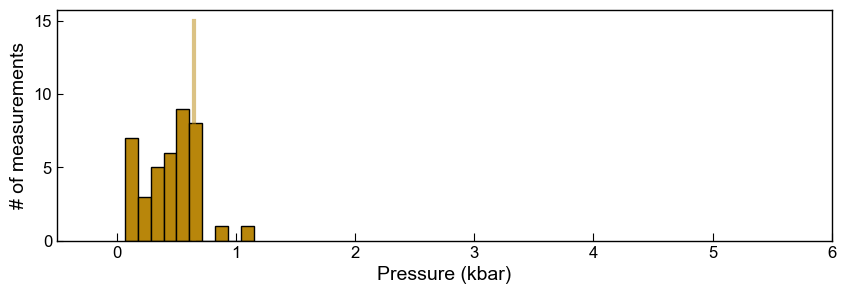

In [15]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,3))

#ax1.hist(P1996_real['P_kbar_calc'], fc='cornflowerblue', ec='k')
ax1.hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')
# ax1.errorbar(np.nanmean(P1996_real['P_kbar_calc']), y_co, 
#                    xerr=2*np.nanstd(P1996_real['P_kbar_calc']), yerr=0,
#              fmt='d', ecolor='k', elinewidth=elw, mfc='cornflowerblue', ms=4, mec='k', capsize=4)
# ax1.errorbar(np.nanmean(P1996_syn['P_kbar_calc']), y_co+offset, 
#                    xerr=2*np.nanstd(P1996_syn['P_kbar_calc']), yerr=0,
#              fmt='*', ecolor='r',  elinewidth=elw, mfc='red', ms=8, mec='k', capsize=4)
ax1.set_xlabel('Pressure (kbar)')
ax1.plot([0.65, 0.65], [0, 15], '-', color='darkgoldenrod', lw=3, alpha=0.5)
ax1.set_xlim([-0.5, 6])
ax1.set_ylabel('# of measurements')
fig.savefig('Seminar_step1.png', dpi=200, bbox_inches='tight')


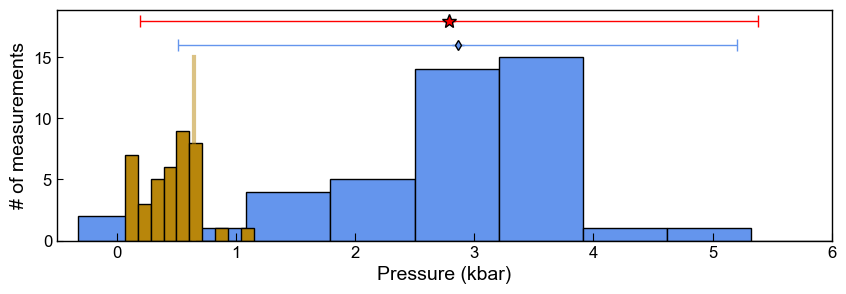

In [16]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,3))

ax1.hist(P1996_real['P_kbar_calc'], fc='cornflowerblue', ec='k')
ax1.hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000, color='darkgoldenrod', ec='k')
#ax1.hist(P1996_syn['P_kbar_calc'], fc='red', ec='k', bins=100)

ax1.errorbar(np.nanmean(P1996_real['P_kbar_calc']), y_co, 
                   xerr=2*np.nanstd(P1996_real['P_kbar_calc']), yerr=0,
             fmt='d', ecolor='cornflowerblue', elinewidth=elw, mfc='cornflowerblue', ms=5, mec='k', capsize=4)
ax1.errorbar(np.nanmean(P1996_syn['P_kbar_calc']), y_co+offset, 
                   xerr=2*np.nanstd(P1996_syn['P_kbar_calc']), yerr=0,
             fmt='*', ecolor='r',  elinewidth=elw, mfc='red', ms=10, mec='k', capsize=4)
ax1.set_xlabel('Pressure (kbar)')
ax1.plot([0.65, 0.65], [0, 15], '-', color='darkgoldenrod', lw=3, alpha=0.5)
ax1.set_xlim([-0.5, 6])
ax1.set_ylabel('# of measurements')
fig.savefig('Seminar_step2.png', dpi=200, bbox_inches='tight')


(array([7., 3., 5., 6., 9., 8., 0., 1., 0., 1.]),
 array([0.07 , 0.178, 0.286, 0.394, 0.502, 0.61 , 0.718, 0.826, 0.934,
        1.042, 1.15 ]),
 <BarContainer object of 10 artists>)

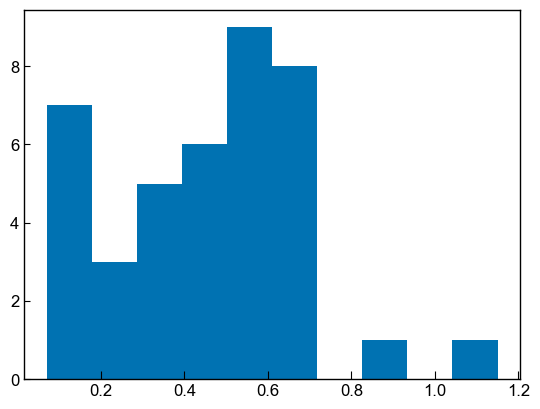

In [17]:
plt.hist(Cpx_B1038_input_all['SaturationP_bars_VESIcal']/1000)

<ErrorbarContainer object of 3 artists>

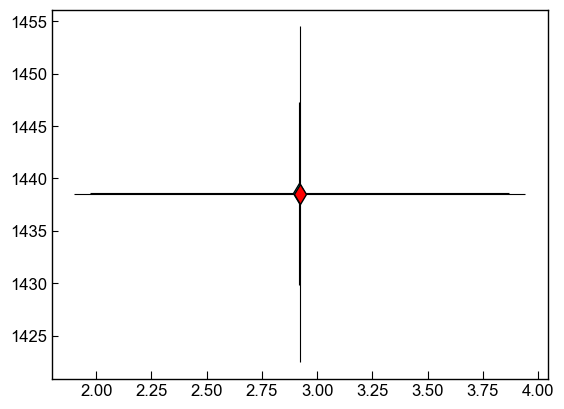

In [18]:
#plt.plot(eq32a32d['P_kbar_calc'], eq32a32d['T_K_calc'], 'or')
#plt.plot(eq32a32d_real['P_kbar_calc'], eq32a32d_real['T_K_calc'], '.k')
plt.errorbar(np.nanmean(eq32a32d['P_kbar_calc']), np.nanmean(eq32a32d['T_K_calc']),
 xerr=np.nanstd(eq32a32d['P_kbar_calc']),
             yerr=np.nanstd(eq32a32d['T_K_calc']),
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k')

plt.errorbar(np.nanmean(eq32a32d_real['P_kbar_calc']), 
             np.nanmean(eq32a32d_real['T_K_calc']),
 xerr=np.nanstd(eq32a32d_real['P_kbar_calc']),
             yerr=np.nanstd(eq32a32d_real['T_K_calc']),
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k')